# In this notebook, we will load our cleaned data set (train) and join with dimension tables for plots 

Take our cleaned train and use our additional dimension tables (items, stores, transactions, holiday_events, oil) to merge for visualizations

In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../data/df_train_stratified.csv")

In [3]:
df_train.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,577745,0.693147,False
1,2013-01-01,25,1105212,1.098612,False
2,2013-01-01,25,958016,1.945910,False
3,2013-01-01,25,279494,1.609438,False
4,2013-01-01,25,1091366,1.098612,False


In [4]:
import pandas as pd

# List of raw parquet file paths with correct directory
raw_files = [
    "../data/raw/df_train_all_v1.parquet",
    "../data/raw/oil.parquet",
    "../data/raw/items.parquet",
    "../data/raw/stores.parquet",
    "../data/raw/transactions.parquet",
    "../data/raw/holiday_events.parquet",
    "../data/raw/df_test.parquet",
    "../data/raw/df_test_2022.parquet",
    "../data/raw/sample_submission.parquet"
 ]

for file in raw_files:
    print(f"\nHead of {file}:")
    df = pd.read_parquet(file)
    print(df.head())


Head of ../data/raw/df_train_all_v1.parquet:
        date  store_nbr  item_nbr  unit_sales  onpromotion
0 2013-01-01         25    103665    2.079442        False
1 2013-01-01         25    105574    0.693147        False
2 2013-01-01         25    105575    1.098612        False
3 2013-01-01         25    108079    0.693147        False
4 2013-01-01         25    108701    0.693147        False

Head of ../data/raw/oil.parquet:
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14
2  2013-01-03       92.97
3  2013-01-04       93.12
4  2013-01-07       93.20

Head of ../data/raw/items.parquet:
                family  class  perishable
item_nbr                                 
96995        GROCERY I   1093           0
99197        GROCERY I   1067           0
103501        CLEANING   3008           0
103520       GROCERY I   1028           0
103665    BREAD/BAKERY   2712           1

Head of ../data/raw/stores.parquet:
                    city                   

In [5]:
# Load stores data and merge with df_train
df_stores = pd.read_parquet("../data/raw/stores.parquet")

# Merge df_train with stores data on store_nbr
df_combined_train_stores = df_train.merge(df_stores, on='store_nbr', how='left')

print("Shape of df_train:", df_train.shape)
print("Shape of df_stores:", df_stores.shape)
print("Shape after merge:", df_combined_train_stores.shape)
print("\nColumns after merge:")
print(df_combined_train_stores.columns.tolist())
print("\nFirst few rows of merged data:")
print(df_combined_train_stores.head())

Shape of df_train: (1254984, 5)
Shape of df_stores: (54, 4)
Shape after merge: (1254984, 9)

Columns after merge:
['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'city', 'state', 'type', 'cluster']

First few rows of merged data:
         date  store_nbr  item_nbr  unit_sales  onpromotion     city  \
0  2013-01-01         25    577745    0.693147        False  Salinas   
1  2013-01-01         25   1105212    1.098612        False  Salinas   
2  2013-01-01         25    958016    1.945910        False  Salinas   
3  2013-01-01         25    279494    1.609438        False  Salinas   
4  2013-01-01         25   1091366    1.098612        False  Salinas   

         state type  cluster  
0  Santa Elena    D        1  
1  Santa Elena    D        1  
2  Santa Elena    D        1  
3  Santa Elena    D        1  
4  Santa Elena    D        1  


In [6]:
# Load oil data and merge with df_combined_train_stores
df_oil = pd.read_parquet("../data/raw/oil.parquet")

# Convert date columns to datetime if needed
df_combined_train_stores['date'] = pd.to_datetime(df_combined_train_stores['date'])
df_oil['date'] = pd.to_datetime(df_oil['date'])

# Merge df_combined_train_stores with oil data on date
df_combined_with_oil = df_combined_train_stores.merge(df_oil, on='date', how='left')

print("Shape of df_combined_train_stores:", df_combined_train_stores.shape)
print("Shape of df_oil:", df_oil.shape)
print("Shape after merge:", df_combined_with_oil.shape)
print("\nColumns after merge:")
print(df_combined_with_oil.columns.tolist())
print("\nFirst few rows of merged data:")
print(df_combined_with_oil.head())

Shape of df_combined_train_stores: (1254984, 9)
Shape of df_oil: (1218, 2)
Shape after merge: (1254984, 10)

Columns after merge:
['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'city', 'state', 'type', 'cluster', 'dcoilwtico']

First few rows of merged data:
        date  store_nbr  item_nbr  unit_sales  onpromotion     city  \
0 2013-01-01         25    577745    0.693147        False  Salinas   
1 2013-01-01         25   1105212    1.098612        False  Salinas   
2 2013-01-01         25    958016    1.945910        False  Salinas   
3 2013-01-01         25    279494    1.609438        False  Salinas   
4 2013-01-01         25   1091366    1.098612        False  Salinas   

         state type  cluster  dcoilwtico  
0  Santa Elena    D        1         NaN  
1  Santa Elena    D        1         NaN  
2  Santa Elena    D        1         NaN  
3  Santa Elena    D        1         NaN  
4  Santa Elena    D        1         NaN  


In [7]:
df_combined_train_stores.isnull().sum()
print(df_combined_with_oil[df_combined_with_oil.isnull().any(axis=1)])

              date  store_nbr  item_nbr  unit_sales  onpromotion       city  \
0       2013-01-01         25    577745    0.693147        False    Salinas   
1       2013-01-01         25   1105212    1.098612        False    Salinas   
2       2013-01-01         25    958016    1.945910        False    Salinas   
3       2013-01-01         25    279494    1.609438        False    Salinas   
4       2013-01-01         25   1091366    1.098612        False    Salinas   
...            ...        ...       ...         ...          ...        ...   
1252923 2017-08-13         36   1964356    1.098612        False   Libertad   
1252924 2017-08-13         20    770461    0.693147        False      Quito   
1252925 2017-08-13         34   2087374    2.197225        False  Guayaquil   
1252926 2017-08-13         40    315322    0.693147        False    Machala   
1252927 2017-08-13         24    691945    1.098612        False  Guayaquil   

               state type  cluster  dcoilwtico  
0 

In [8]:
# Fill missing oil values using linear interpolation and forward fill for remaining gaps
print(f"Missing oil values before filling: {df_combined_with_oil['dcoilwtico'].isnull().sum()}")

# Step 1: Linear interpolation for gaps in the middle of the time series
df_combined_with_oil['dcoilwtico'] = df_combined_with_oil['dcoilwtico'].interpolate(method='linear')

# Step 2: Forward fill for any remaining missing values at the end
df_combined_with_oil['dcoilwtico'] = df_combined_with_oil['dcoilwtico'].ffill()

# Step 3: Backward fill for any remaining missing values at the beginning  
df_combined_with_oil['dcoilwtico'] = df_combined_with_oil['dcoilwtico'].bfill()

print(f"Missing oil values after filling: {df_combined_with_oil['dcoilwtico'].isnull().sum()}")

Missing oil values before filling: 405231
Missing oil values after filling: 0


In [9]:
# Load holiday data and merge with df_combined_with_oil
df_holidays = pd.read_parquet("../data/raw/holiday_events.parquet")

# Convert date column to datetime if needed
df_holidays['date'] = pd.to_datetime(df_holidays['date'])

# Select only specific columns from holidays
df_holidays_subset = df_holidays[['date', 'type', 'locale', 'transferred']]

# Merge df_combined_with_oil with holiday data on date
df_combined_with_holidays = df_combined_with_oil.merge(df_holidays_subset, on='date', how='left')

print("Shape of df_combined_with_oil:", df_combined_with_oil.shape)
print("Shape of df_holidays_subset:", df_holidays_subset.shape)
print("Shape after merge:", df_combined_with_holidays.shape)
print("\nColumns after merge:")
print(df_combined_with_holidays.columns.tolist())
print("\nFirst few rows of merged data:")
print(df_combined_with_holidays.head())

Shape of df_combined_with_oil: (1254984, 10)
Shape of df_holidays_subset: (350, 4)
Shape after merge: (1279718, 13)

Columns after merge:
['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'transferred']

First few rows of merged data:
        date  store_nbr  item_nbr  unit_sales  onpromotion     city  \
0 2013-01-01         25    577745    0.693147        False  Salinas   
1 2013-01-01         25   1105212    1.098612        False  Salinas   
2 2013-01-01         25    958016    1.945910        False  Salinas   
3 2013-01-01         25    279494    1.609438        False  Salinas   
4 2013-01-01         25   1091366    1.098612        False  Salinas   

         state type_x  cluster  dcoilwtico   type_y    locale transferred  
0  Santa Elena      D        1       93.14  Holiday  National       False  
1  Santa Elena      D        1       93.14  Holiday  National       False  
2  Santa Elena      D    

In [10]:
df_combined_with_holidays['type_y'] = df_combined_with_holidays['type_y'].fillna("None")

In [11]:
df_combined_with_holidays['locale'] = df_combined_with_holidays['locale'].fillna("None")

In [12]:
df_combined_with_holidays['transferred'] = df_combined_with_holidays['transferred'].fillna(False)

C:\Users\atdok\AppData\Local\Temp\ipykernel_38308\570506036.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_combined_with_holidays['transferred'] = df_combined_with_holidays['transferred'].fillna(False)


In [13]:
# Load items data and merge with df_combined_with_holidays
df_items = pd.read_parquet("../data/raw/items.parquet")

# Merge df_combined_with_holidays with items data on item_nbr
df_combined_with_items = df_combined_with_holidays.merge(df_items, on='item_nbr', how='left')

print("Shape of df_combined_with_holidays:", df_combined_with_holidays.shape)
print("Shape of df_items:", df_items.shape)
print("Shape after merge:", df_combined_with_items.shape)
print("\nColumns after merge:")
print(df_combined_with_items.columns.tolist())
print("\nFirst few rows of merged data:")
print(df_combined_with_items.head())

Shape of df_combined_with_holidays: (1279718, 13)
Shape of df_items: (4100, 3)
Shape after merge: (1279718, 16)

Columns after merge:
['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'transferred', 'family', 'class', 'perishable']

First few rows of merged data:
        date  store_nbr  item_nbr  unit_sales  onpromotion     city  \
0 2013-01-01         25    577745    0.693147        False  Salinas   
1 2013-01-01         25   1105212    1.098612        False  Salinas   
2 2013-01-01         25    958016    1.945910        False  Salinas   
3 2013-01-01         25    279494    1.609438        False  Salinas   
4 2013-01-01         25   1091366    1.098612        False  Salinas   

         state type_x  cluster  dcoilwtico   type_y    locale  transferred  \
0  Santa Elena      D        1       93.14  Holiday  National        False   
1  Santa Elena      D        1       93.14  Holiday  National       

In [14]:
df_combined_with_items.isnull().sum()

date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
city           0
state          0
type_x         0
cluster        0
dcoilwtico     0
type_y         0
locale         0
transferred    0
family         0
class          0
perishable     0
dtype: int64

In [15]:
# Load transactions data and merge with df_combined_with_items
df_transactions = pd.read_parquet("../data/raw/transactions.parquet")

# Convert date column to datetime if needed
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Merge df_combined_with_items with transactions data on date and store_nbr
df_combined_final = df_combined_with_items.merge(df_transactions, on=['date', 'store_nbr'], how='left')

print("Shape of df_combined_with_items:", df_combined_with_items.shape)
print("Shape of df_transactions:", df_transactions.shape)
print("Shape after merge:", df_combined_final.shape)
print("\nColumns after merge:")
print(df_combined_final.columns.tolist())
print("\nFirst few rows of merged data:")
print(df_combined_final.head())

Shape of df_combined_with_items: (1279718, 16)
Shape of df_transactions: (83488, 3)
Shape after merge: (1279718, 17)

Columns after merge:
['date', 'store_nbr', 'item_nbr', 'unit_sales', 'onpromotion', 'city', 'state', 'type_x', 'cluster', 'dcoilwtico', 'type_y', 'locale', 'transferred', 'family', 'class', 'perishable', 'transactions']

First few rows of merged data:
        date  store_nbr  item_nbr  unit_sales  onpromotion     city  \
0 2013-01-01         25    577745    0.693147        False  Salinas   
1 2013-01-01         25   1105212    1.098612        False  Salinas   
2 2013-01-01         25    958016    1.945910        False  Salinas   
3 2013-01-01         25    279494    1.609438        False  Salinas   
4 2013-01-01         25   1091366    1.098612        False  Salinas   

         state type_x  cluster  dcoilwtico   type_y    locale  transferred  \
0  Santa Elena      D        1       93.14  Holiday  National        False   
1  Santa Elena      D        1       93.14  Hol

In [16]:
df_combined_final.isnull().sum()

date               0
store_nbr          0
item_nbr           0
unit_sales         0
onpromotion        0
city               0
state              0
type_x             0
cluster            0
dcoilwtico         0
type_y             0
locale             0
transferred        0
family             0
class              0
perishable         0
transactions    2165
dtype: int64

In [18]:
df_combined_final.to_parquet("../data/cleaned_combined.parquet", index = False)

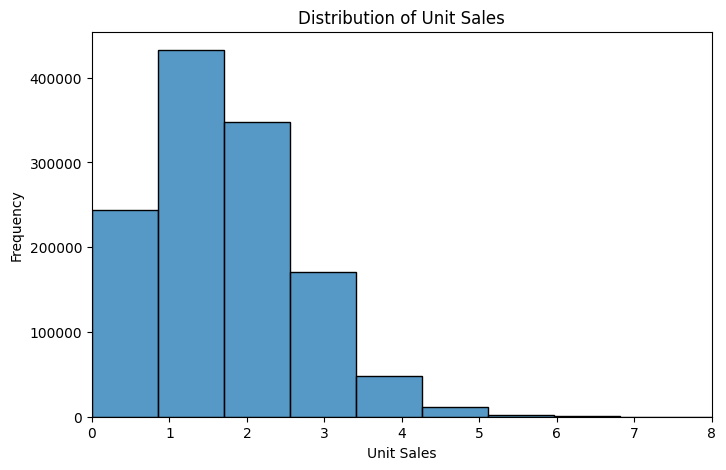

In [19]:
# Distribution of sale counts
plt.figure(figsize=(8,5))
sns.histplot(df_train["unit_sales"], bins=10, kde=False)
plt.title("Distribution of Unit Sales")
plt.xlabel("Unit Sales")
plt.ylabel("Frequency")
plt.xlim(0, 8) 
plt.show()

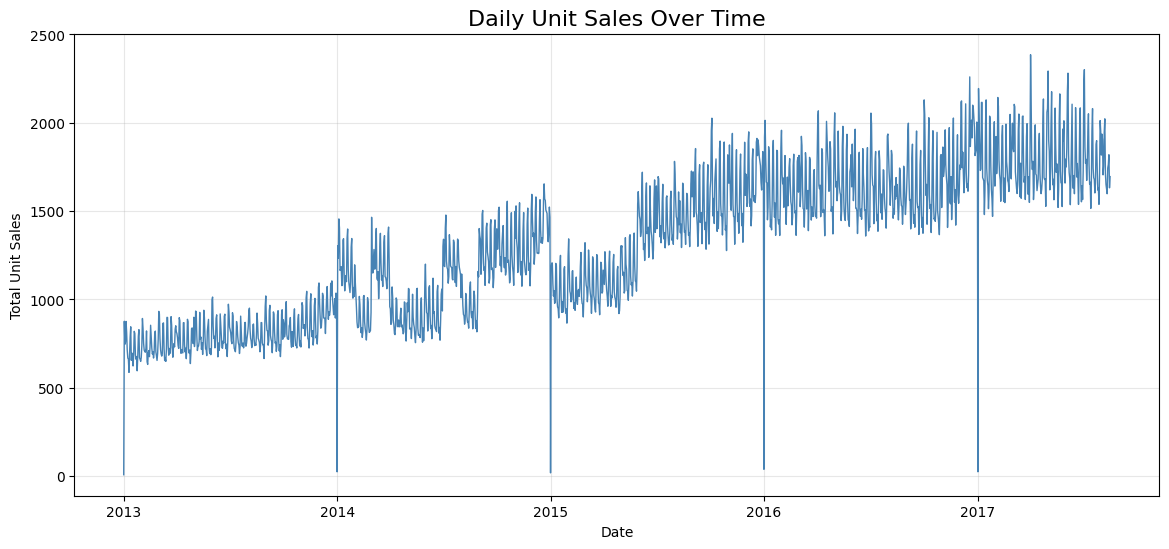

In [20]:
# Time plots of daily sales

# Convert date column to datetime if not already
df_train['date'] = pd.to_datetime(df_train['date'])

# Aggregate sales per day (across all stores and items)
daily_sales = df_train.groupby('date')['unit_sales'].sum().reset_index()

# Plot time series
plt.figure(figsize=(14,6))
plt.plot(daily_sales['date'], daily_sales['unit_sales'], color='steelblue', linewidth=1)
plt.title("Daily Unit Sales Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Unit Sales")
plt.grid(True, alpha=0.3)
plt.show()